In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('./Mall_Customers.csv')

In [6]:
df.sample(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
182,183,Male,46,98,15
77,78,Male,40,54,48
197,198,Male,32,126,74
189,190,Female,36,103,85
118,119,Female,51,67,43
146,147,Male,48,77,36
71,72,Female,47,49,42
162,163,Male,19,81,5
37,38,Female,30,34,73
87,88,Female,22,57,55


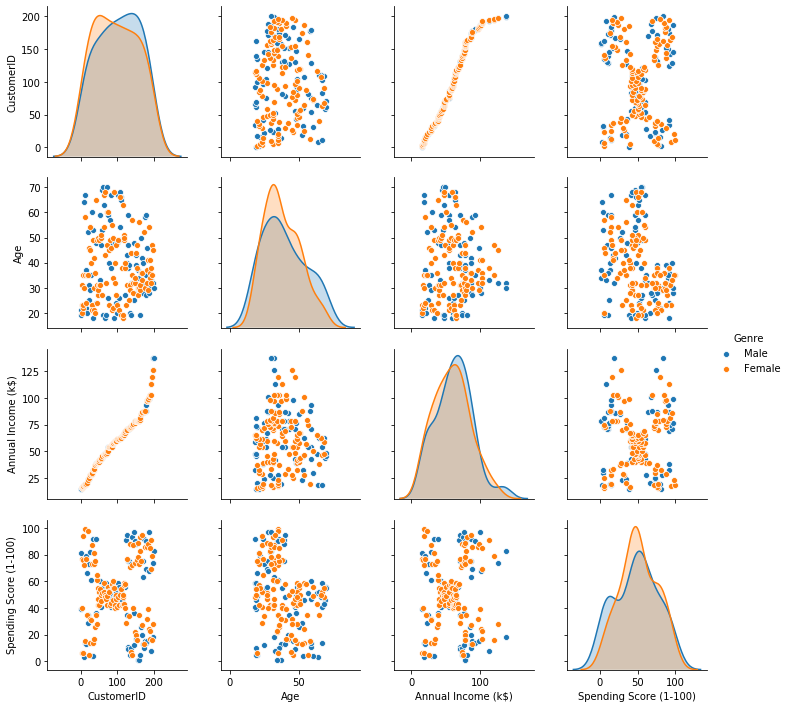

In [5]:
sns.pairplot(df, hue='Genre')

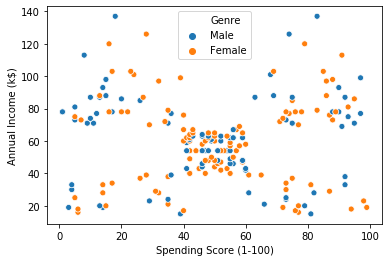

In [6]:
sns.scatterplot(x=df['Spending Score (1-100)'], y=df['Annual Income (k$)'], hue=df['Genre'])

# KMN

In [8]:
X=df.drop('Genre', axis=1)

In [9]:
df['label']=df.Genre.map({'Female':1,
                         'Male':0})

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

kmeans.cluster_centers_

array([[150.        ,  37.77227723,  81.35643564,  50.45544554],
       [ 50.        ,  39.94949495,  39.34343434,  49.93939394]])

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

In [13]:
confusion_matrix(df['label'], kmeans.labels_)

array([[48, 40],
       [53, 59]])

In [16]:
print(classification_report(df['label'], kmeans.labels_))

              precision    recall  f1-score   support

           0       0.48      0.55      0.51        88
           1       0.60      0.53      0.56       112

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.53       200
weighted avg       0.54      0.54      0.54       200



# Agglomerative hirarchical clustering

In [17]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
##### create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(X)

In [19]:
confusion_matrix(df['label'], y_hc)

array([[51, 37],
       [73, 39]])

In [22]:
print(classification_report(df['label'], y_hc))

              precision    recall  f1-score   support

           0       0.41      0.58      0.48        88
           1       0.51      0.35      0.41       112

    accuracy                           0.45       200
   macro avg       0.46      0.46      0.45       200
weighted avg       0.47      0.45      0.44       200



# KMN Unlabeled

In [13]:
X2=df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [14]:
from sklearn.metrics import silhouette_score

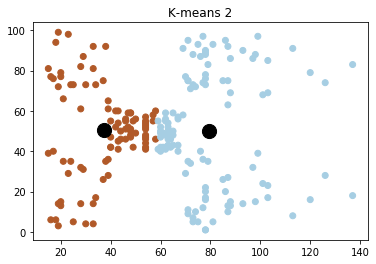

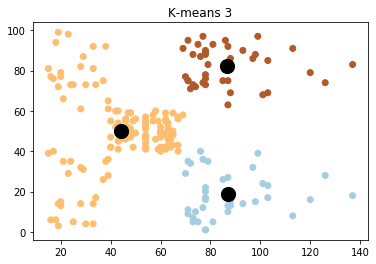

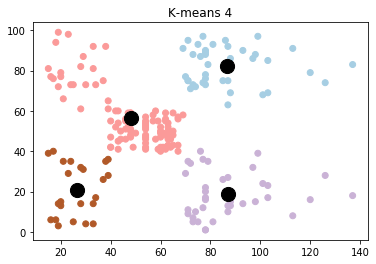

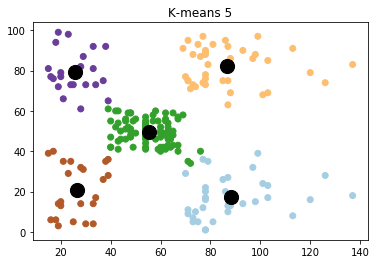

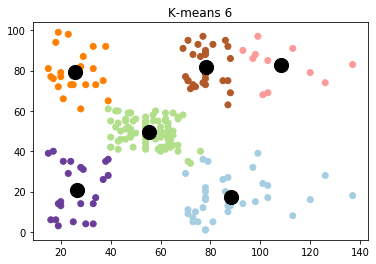

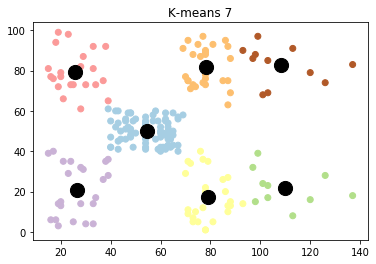

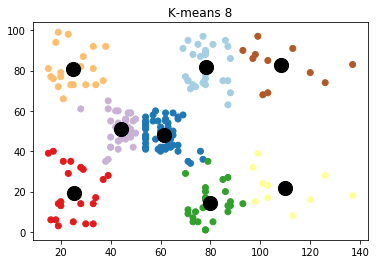

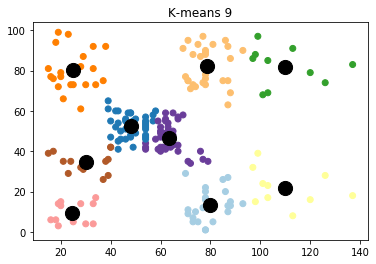

In [25]:
Sum_of_squared_distances = []
see=[]
for n in range (2,10):
    kmeans = KMeans(n_clusters=n, random_state=0).fit(X2)
    y_pred = kmeans.predict(X2)
    Sum_of_squared_distances.append(kmeans.inertia_)
    see.append([n, silhouette_score(X2, kmeans.labels_)])
    plt.scatter(X2['Annual Income (k$)'], X2['Spending Score (1-100)'],c=y_pred, cmap='Paired')
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='Black', s=200)
    plt.title("K-means {}".format(n))
    plt.show()

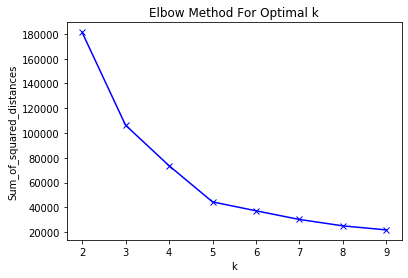

In [23]:
K=range(2,10)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [23]:
see

,0,1
0,2,0.296897
1,3,0.467614
2,4,0.493196
3,5,0.553932
4,6,0.537968
5,7,0.526428
6,8,0.457044
7,9,0.456303


Text(0.5, 1.0, 'Silhouette score Method For Optimal k')

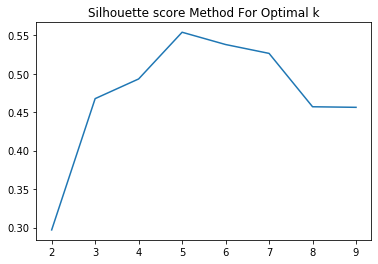

In [24]:
see=pd.DataFrame(see)
plt.plot(see[0],see[1])
plt.title('Silhouette score Method For Optimal k')

Elbow method shows that the best kmean is for k=5

In [14]:
 kmeans = KMeans(n_clusters=5, random_state=0).fit(X2)

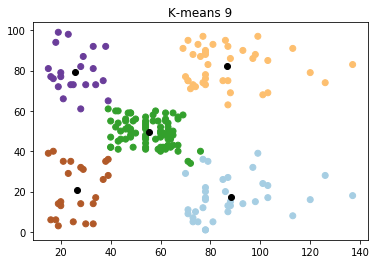

In [19]:
y_pred = kmeans.predict(X2)
plt.scatter(X2['Annual Income (k$)'], X2['Spending Score (1-100)'],c=y_pred, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='Black')
plt.title("K-means {}".format(n))
plt.show()

In [36]:
df['cluster']=kmeans.labels_

In [37]:
df.head(20)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label,cluster
0,1,Male,19,15,39,0,4
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,1,4
5,6,Female,22,17,76,1,3
6,7,Female,35,18,6,1,4
7,8,Female,23,18,94,1,3
8,9,Male,64,19,3,0,4
9,10,Female,30,19,72,1,3


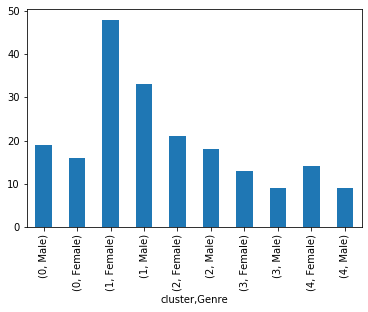

In [46]:
df.groupby('cluster')['Genre'].value_counts().plot(kind='bar')
    